# Modeling of Wine Quality
Machine Learning I Final Project
By Ange Olson and Pavani Samala

##Introduction

Wine is an alcoholic beverage produced by fermenting wine grapes. There is a variety of wines made around the world, each region having its own fermentation process and ingredients. For example, red wines are made from black wine grapes and white wines are made from both white and black wine grapes. This report will use data regarding Vinho Verde, a wine native to Portugal that is available in both red and white.  

The purpose of this project is to identify the best performing model to predict wine quality and analyze which features ar most important to making a wuality wine. This summary report will include background information about the dataset, the process of cleaning and preprocessing, exploratory data analysis (EDA), two different predictive models, and an analysis of our results.

The findings from this project can be used to assist winemakers understand their consumers' preferences in the taste of wine and market their goods with reasonable prices.   


##Background of Dataset

The dataset analyzed was taken from Kaggle and contains data about wine characteristics. This dataset was created by merging information about red and white Vinho Verde data. The dataset contains 6,498 observations and 13 variables. Each variable is listed below:


*  type (red or white)
*  fixed acidity
*  volatile acidity
*  citric acid
*  residual sugar 
*  chlorides
*  free sulfur dioxide
*  total sulfur dioxide
*  density
*  pH
*  sulphates
*  alcohol
*  **target: quality**, based on a 1-10 scale. 

<br>

The original dataset comes from a 2009 paper ([Cortez et al., 2009](http://www3.dsi.uminho.pt/pcortez/wine5.pdf)). While that paper split the data into red and white wine types, we seek to combine the data to provide a larger training sample for a single model. Additionally, that paper treated the target variable (`quality`) as a multinomial categorical; we instead treat the quality score as a continuous variable to provide more information on where on the quality scale the wine falls, as it is likely the true ratings of the wiens are rounded.














## Initial Set Up
First, we set up our environment in Google Collab.

### Google Drive

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/Project/'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/Project/code/utilities/p2_shallow_learning/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/Project/code/models/p2_shallow_learning/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

### Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 


# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")

### TensorFlow 

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

### Random Seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

In [ ]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utilities
%run pmlm_utilities_shallow.ipynb

/content/drive/My Drive/Colab Notebooks/Project/code/utilities/p2_shallow_learning


### Load Dataset

In [ ]:
import pandas as pd

# Load the raw training data
df_raw = pd.read_csv(abspath_curr + 'winequalityN.csv',
                     header=0)
# Make a copy of df_raw_train
df = df_raw.copy(deep=True)

# Get the name of the target
target = 'quality'

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df.shape[0], df.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,6497,13


In [ ]:
# Print the first 5 rows of df
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


###Exploratory Data Analysis (EDA)

To gain an understanding of the dataset, a brief EDA was performed and the data was visulized using scatter plots and violin plots.

The table below summarizes the dataset and provides important statitiscal values. The average wine quality is approximetly 5.812, and ranges from 3 to 9. Intuitively, alcohol will be an important variable to consider in the EDA. It ranges from 8 to 14.9 and has an average of 10.49. 

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


The correlation map below quanitifes how each variable is related to wine quality. Alcohol is the most positively correlated variable and chlorides, volitie acidity, and density are the most negatively correlated variables.

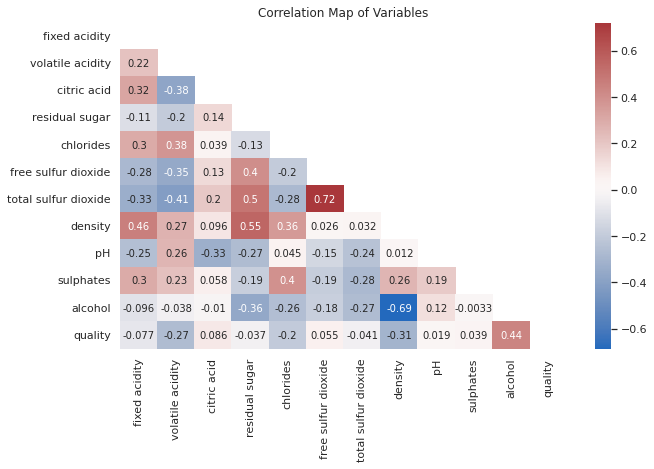

alcohol             0.444319
chlorides          -0.200886
volatile acidity   -0.265953
density            -0.305858
Name: quality, dtype: float64


In [ ]:
# create corr matrix
corr = df.corr()

# create important feature list 
df_corr = df.corr()['quality'][:-1]
important_feature_list = df_corr[abs(df_corr) > 0.1].sort_values(ascending=False)

# plot 
fig, ax = plt.subplots(figsize=(10,6)) 
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, annot_kws={"size":10}, cmap = 'vlag', mask=mask)
plt.title("Correlation Map of Variables")
plt.show()

# print important features
print(important_feature_list)

Using the most correlated variables, scatter plots and violin plots were created to uncover patterns and anomalies between the wine qualities. 

The scatter plot comparing wine quality and alcohol content shows that most of the wines are mid-tier qualities ranging from 5 to 7. It is interseting to point out however that the higher and lower wine qualities have smaller ranges of alcohol content. For example 8 and 9 qualities mostly range from 11 to 13 and 3 and 4 qualities range from 9 to 11. The alcohol content for mid-tier wine qualities seem to range the whole scale from 9 to 14. The scatter plot comparing volitile acidy and quality shows another intesting observation regarding trends. The range of volitile acidy increases as the quality of the wine decreases.


The volin plots reveal that there are chloride outliers for wines with a quality from 3-8. There are also denisty outliers for a wine quality of 6.

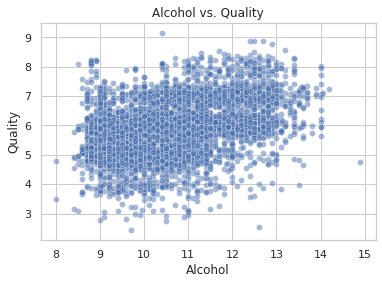

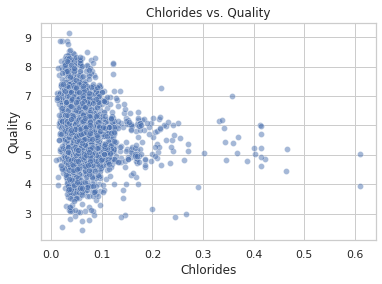

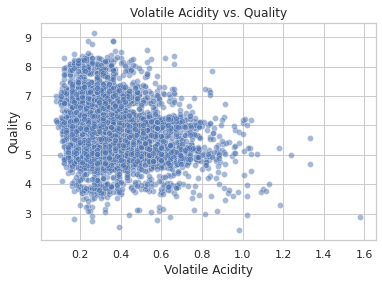

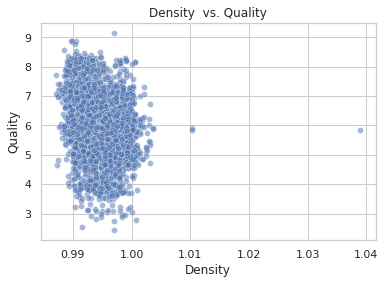

In [ ]:
# Jitter the quality variable for scatterplots below

quality_jitter = df['quality'] + np.random.normal(0, 0.25, size=len(df['quality']))

# Scatter plots for variables most correlated with quality

sns.scatterplot(x = df['alcohol'], y = quality_jitter, alpha=10/20)
plt.title("Alcohol vs. Quality")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.show()

sns.scatterplot(x = df['chlorides'], y = quality_jitter, alpha=10/20)
plt.title("Chlorides vs. Quality")
plt.xlabel("Chlorides")
plt.ylabel("Quality")
plt.show()

sns.scatterplot(x = df['volatile acidity'], y = quality_jitter, alpha=10/20)
plt.title("Volatile Acidity vs. Quality")
plt.xlabel("Volatile Acidity")
plt.ylabel("Quality")
plt.show()

sns.scatterplot(data = df, x = df['density'], y = quality_jitter, alpha=10/20)
plt.title("Density  vs. Quality")
plt.xlabel("Density")
plt.ylabel("Quality")
plt.show()

df_eda = df.copy()

#### Alcohol vs Quality

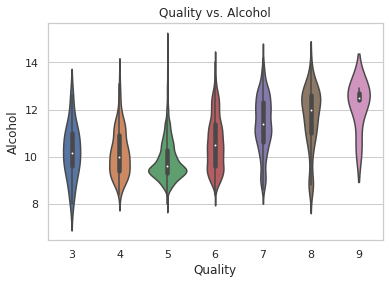

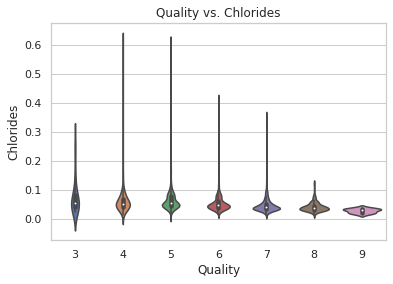

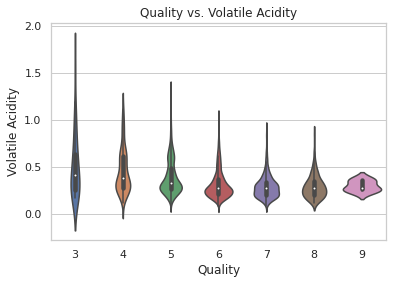

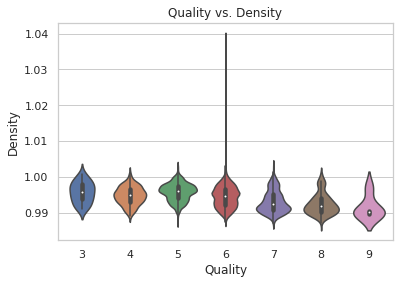

In [ ]:
sns.violinplot(x='quality', y='alcohol', data=df)
plt.title("Quality vs. Alcohol")
plt.ylabel("Alcohol")
plt.xlabel("Quality")
plt.show()

sns.violinplot(x='quality', y='chlorides', data=df)
plt.title("Quality vs. Chlorides")
plt.ylabel("Chlorides")
plt.xlabel("Quality")
plt.show()

sns.violinplot(x='quality', y='volatile acidity', data=df)
plt.title("Quality vs. Volatile Acidity")
plt.ylabel("Volatile Acidity")
plt.xlabel("Quality")
plt.show()

sns.violinplot(x='quality', y='density', data=df)
plt.title("Quality vs. Density")
plt.ylabel("Density")
plt.xlabel("Quality")
plt.show()
 


## Data Preprocessing

To effectively train the models, the data was pre-processed to handle uncommon features, remove missing variables, encode categorical features, and ensure that all the features are equally distributed among the training, validation, and testing data. The dataset was split into training, validation, and testing datasets using a 70-15-15 split respectfully. 

### Splitting the Data 

The code below splits the data into 70% training, 15% validation, and 15% test. 

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (70%) and a secondary split (30%)
df_train, df_split = train_test_split(df, train_size=0.7, random_state=random_seed)

# Reset the index
df_train, df_split = df_train.reset_index(drop=True), df_split.reset_index(drop=True)

In [ ]:
# Divide the secondary split data into test and validation
df_val, df_test = train_test_split(df_split, train_size=0.5, random_state=random_seed)

# Reset the index
df_val, df_test = df_val.reset_index(drop=True), df_test.reset_index(drop=True)

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,4547,13


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,975,13


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,975,13


### Handling Uncommon Features 

In [ ]:
# Call common_var_checker
# See the implementation in pmlm_utilities.ipynb
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
df_common_var

,common var
0,alcohol
1,chlorides
2,citric acid
3,density
4,fixed acidity
5,free sulfur dioxide
6,pH
7,quality
8,residual sugar
9,sulphates


In [ ]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


No uncommon features exist in the dataset. 

### Identifying Indentifiers

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [ ]:
# Call id_checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

""
0
1
2
3
4


No identifiers exist. 

### Handling Missing Variables

In [ ]:
# Call nan_checker on df
# See the implementation in pmlm_utilities.ipynb
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,fixed acidity,0.001539,float64
1,pH,0.001385,float64
2,volatile acidity,0.001231,float64
3,sulphates,0.000616,float64
4,citric acid,0.000462,float64
5,residual sugar,0.000308,float64
6,chlorides,0.000308,float64


All proportions of missing data are under 1%; we impute missing values with the mean.

In [ ]:
# Print the unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,float64


In [ ]:
# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype
0,fixed acidity,0.001539,float64
1,pH,0.001385,float64
2,volatile acidity,0.001231,float64
3,sulphates,0.000616,float64
4,citric acid,0.000462,float64
5,residual sugar,0.000308,float64
6,chlorides,0.000308,float64


####Separating the training, validation and test data

In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
from sklearn.impute import SimpleImputer

# If there are missing values
if len(df_miss['var']) > 0:
    # The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='mean')

    # Impute the variables with missing values in df_train, df_val and df_test 
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

### Encoding the data

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,object
1,float64
2,int64


#### Identifying categorical variables

In [ ]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,type,2


#### Encoding categorical variables
We use one-hot encoding on the varibale `type`.

In [ ]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(df_cat['var'], [target]))

# Print the first 5 rows of df
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,6.1,0.17,0.28,2.5,0.028,22.0,98.0,0.99072,3.16,0.37,11.1,7,0,1
1,7.0,0.15,0.28,14.7,0.051,29.0,149.0,0.99792,2.96,0.39,9.0,7,0,1
2,6.5,0.19,0.32,1.4,0.040,31.0,132.0,0.99220,3.36,0.54,10.8,7,0,1
3,7.3,0.29,0.30,13.0,0.043,46.0,238.0,0.99860,3.06,0.41,8.7,6,0,1
4,7.3,0.36,0.62,7.1,0.033,48.0,185.0,0.99472,3.14,0.62,10.6,6,0,1


### Separating out datasets

In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,4547,14


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,975,14


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,975,14


### Splitting Target and Feature Datasets

In [ ]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

#### Standardizing the Features

In [ ]:
# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.transform(X_val)

# Standardize the test data
X_test = ss.transform(X_test)

#### Standardizing the Target

In [ ]:
# Standardize the training data
y_train = ss.fit_transform(y_train.reshape(-1, 1)).reshape(-1)

# Standardize the validation data
y_val = ss.transform(y_val.reshape(-1, 1)).reshape(-1)

# Standardize the test data
y_test = ss.transform(y_test.reshape(-1, 1)).reshape(-1)

##Model Training and Hyperparameter Tuning

Since wine quality is a continuous variable, Stochastic Gradient Descent linear regression, Mini Batch Gradient Descent linear regression, and Random Forest regression tree models were trained to predict wine quality. To ensure that the model learns efficenlty, hyperparameter tuning was utlized to find the optimal learning and alpha rates for linear regression and tree splits and tree smaples for the randome forest decision trees. The two hyperparameter tuning methods employed were Grid Search and Randomized Search.  

#### Standardizing the Features

In [ ]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_model_shallow

# Import the shallow utilities
%run pmlm_models_shallow.ipynb

/content/drive/My Drive/Colab Notebooks/Project/code/models/p2_shallow_learning


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

models = {'sgd': SGDRegressor(random_state=random_seed),'lr_mbgd': LinearRegression_MBGD(random_state=random_seed), 'rf': RandomForestRegressor(random_state=random_seed)}

#### Creating Dictionary

In [ ]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

####Getting the predefined split cross-validator

In [ ]:
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

####GridSearchCV

In [ ]:
param_grids = {}

In [ ]:
# Set parameters for SGDRegressor Grid Search

# The parameter grid of eta
eta_grid_sgd = [0.00001, 0.0001, 0.001, 0.015, 0.01]

# The parameter grid of alpha
alpha_grid_sgd = [0.001, 0.01, 0.1]

# Update param_grids
param_grids['sgd'] = [{'model__eta0': eta_grid_sgd,
                       'model__alpha': alpha_grid_sgd}]

In [ ]:
# Set parameters for Linear Regression Grid Search

# The parameter grid of eta
eta_grid_lr = [0.00001, 0.0001, 0.001, 0.015, 0.01]

# The parameter grid of alpha
alpha_grid_lr = [0.001, 0.01, 0.1]

# Update param_grids
param_grids['lr_mbgd'] = [{'model__eta': eta_grid_lr,
                           'model__alpha': alpha_grid_lr}]

In [ ]:
# Set parameters for Random Forest Regressor Grid Search

# The grids for min_samples_split
min_samples_split_grids = [1, 2, 30]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 30]

# The grids for n_estimators
n_estimators_grids = [50, 100, 150, 200]

# Update param_grids
param_grids['rf'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids,
                       'model__n_estimators': n_estimators_grids}]

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Learning Curvers for Linear Models 

Below are the visuals comparing training and validation loss for the different learning rates and alpha values. Across the board, we see that the models are underfitting, suggesting that model complexity needs to increase. 

When the learning rate is set to 0.00001, 0.0001, or 0.001 for SGD linear regression, the model is underfitting. The model performs poorly when the learning rate is set to 0.015, but underfitting is less visible. 

Looking at the MBDG linear regression, all the models seem to be underfitting since the training loss is much higher than the validation loss.

#####SGDRegressor Training and Validation Loss

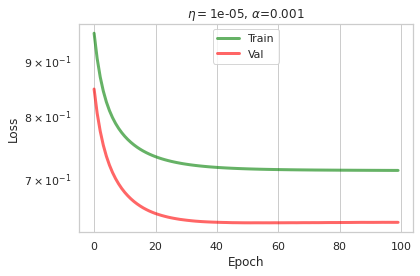

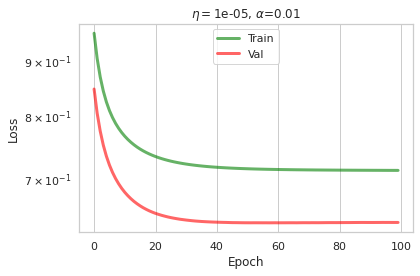

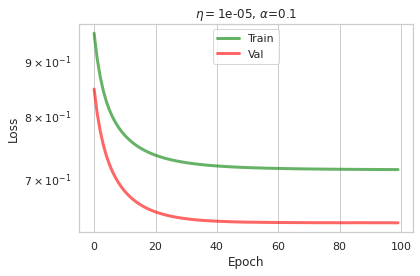

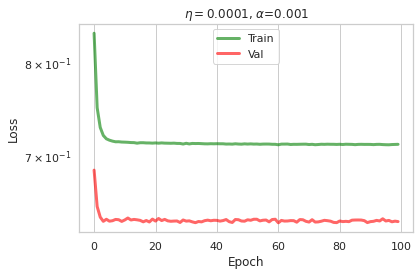

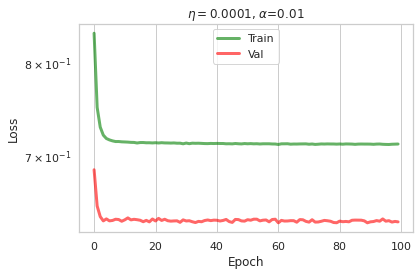

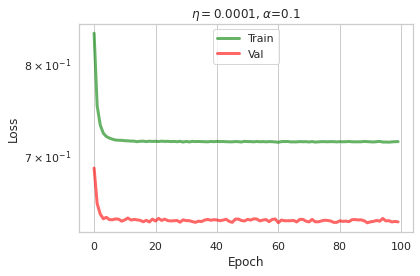

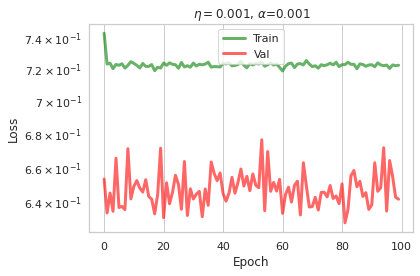

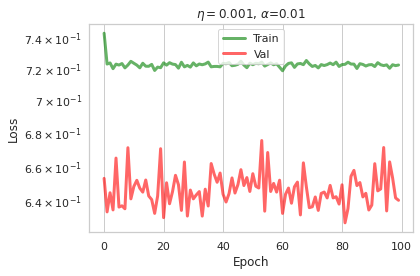

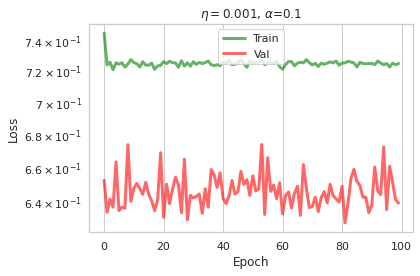

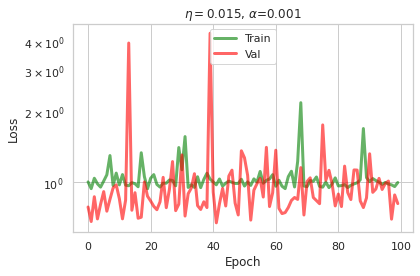

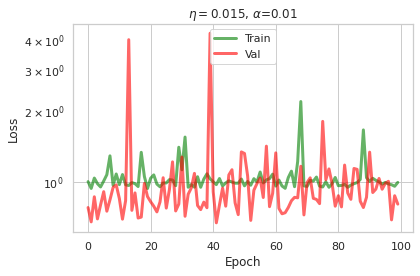

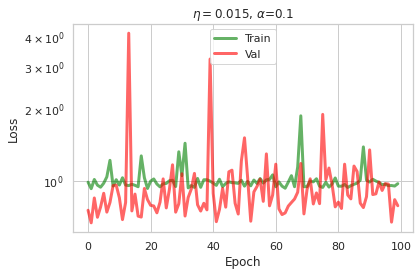

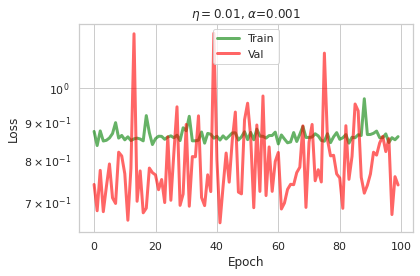

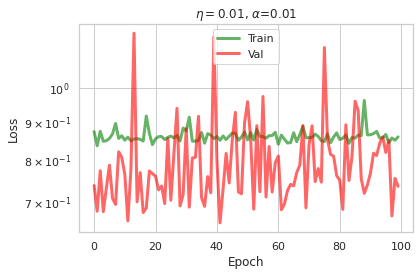

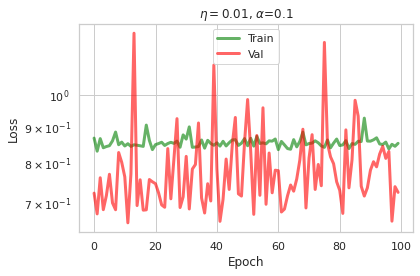

In [ ]:
# For each eta
for eta in eta_grid_sgd:
    # For each alpha
    for alpha in alpha_grid_sgd:        
        # The SGDRegressor
        sgd = LinearRegression_SGD(eta=eta, alpha=alpha)

        # Train sgd
        sgd.fit(X_train, y_train, X_val, y_val)

        # Plot the train loss
        plt.plot(range(len(sgd.loss_train)), sgd.loss_train, color='green', lw=3, alpha=0.6)  
        
        # Plot the validation loss
        plt.plot(range(len(sgd.loss_val)), sgd.loss_val, color='red', lw=3, alpha=0.6) 

        # Set x-axis
        plt.xlabel('Epoch')

        # Set y-axis
        plt.ylabel('Loss')
        plt.yscale('log')
        
        # Set tick parameters
        plt.tick_params(axis='y', which='both', left=False)

        # Set legend
        plt.legend(['Train', 'Val'], loc='upper center')

        # Set the title
        plt.title(r'$\eta=$' + str(eta) + ', ' + r'$\alpha$=' + str(alpha))
        
        # Save and show the figure
        plt.tight_layout()
        #plt.savefig(abspath_curr + 'result/figure/lr_sgd_loss_' + str(eta).replace('.', '') + '_' + str(alpha).replace('.', '') + '.pdf')
        plt.show()

#####LinearRegression_MBGD Training and Validation Loss

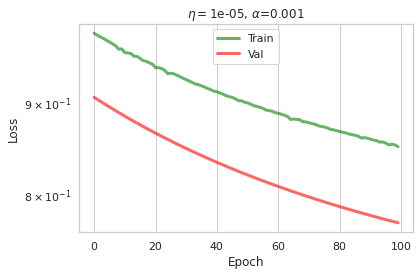

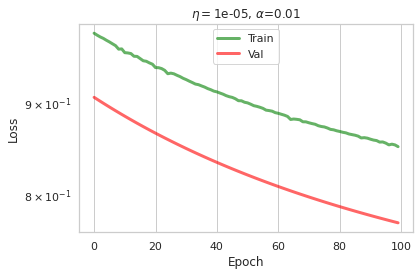

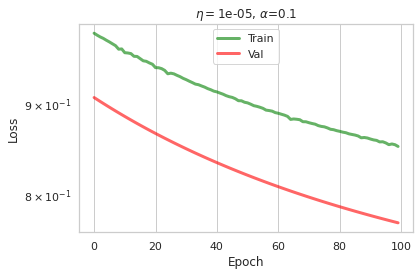

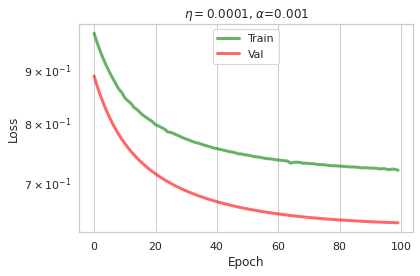

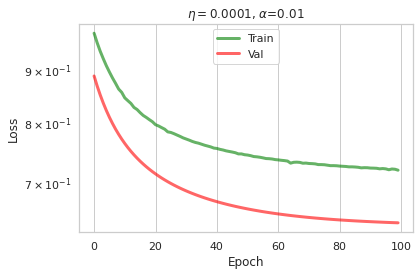

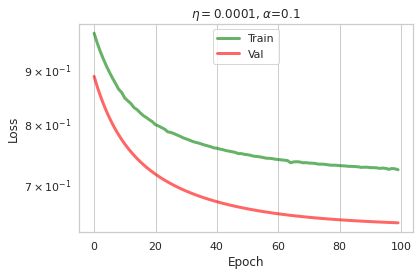

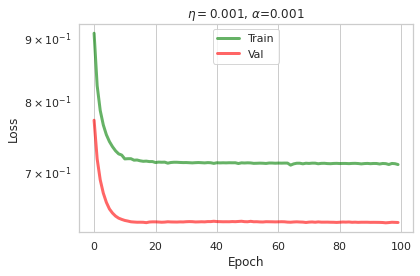

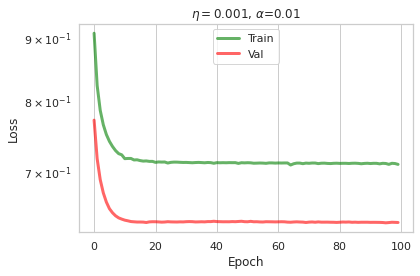

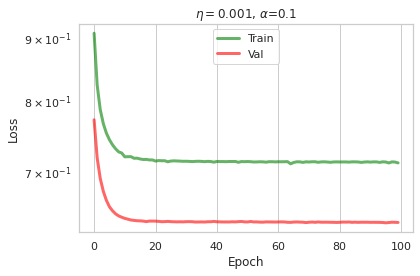

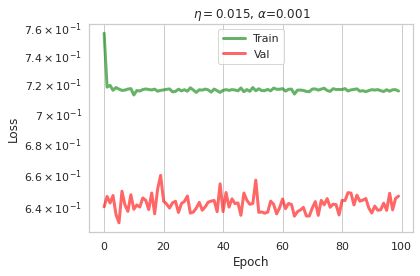

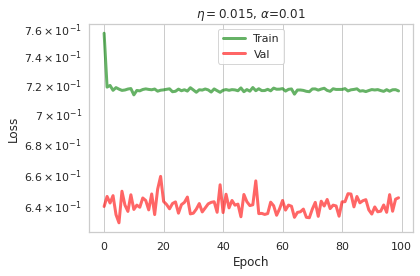

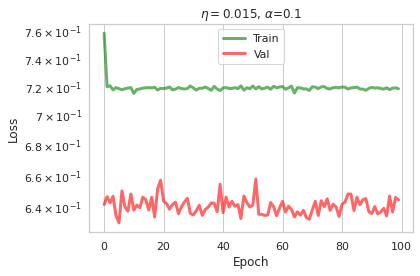

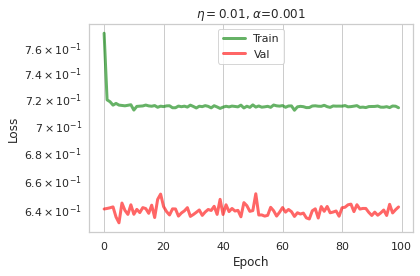

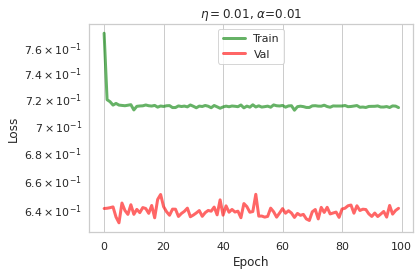

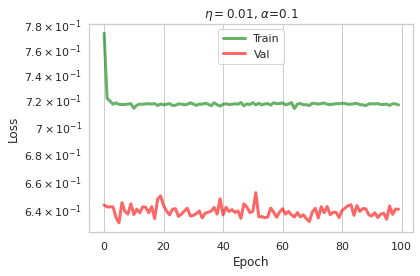

In [ ]:
# For each eta
for eta in eta_grid_lr:
    # For each alpha
    for alpha in alpha_grid_lr:        
        # The LinearRegression_MBGD
        lr_mbgd = LinearRegression_MBGD(eta=eta, alpha=alpha)

        # Train lr_mbgd
        lr_mbgd.fit(X_train, y_train, X_val, y_val)

        # Plot the train loss
        plt.plot(range(len(lr_mbgd.loss_train)), lr_mbgd.loss_train, color='green', lw=3, alpha=0.6)  
        
        # Plot the validation loss
        plt.plot(range(len(lr_mbgd.loss_val)), lr_mbgd.loss_val, color='red', lw=3, alpha=0.6) 

        # Set x-axis
        plt.xlabel('Epoch')

        # Set y-axis
        plt.ylabel('Loss')
        plt.yscale('log')
        
        # Set tick parameters
        plt.tick_params(axis='y', which='both', left=False)

        # Set legend
        plt.legend(['Train', 'Val'], loc='upper center')

        # Set the title
        plt.title(r'$\eta=$' + str(eta) + ', ' + r'$\alpha$=' + str(alpha))
        
        # Save and show the figure
        plt.tight_layout()
        #plt.savefig(abspath_curr + 'result/figure/lr_mbgd_loss_' + str(eta).replace('.', '') + '_' + str(alpha).replace('.', '') + '.pdf')
        plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='neg_mean_squared_error',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + 'result/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,-0.433770,"{'model__min_samples_leaf': 1, 'model__min_sam...","((DecisionTreeRegressor(max_features='auto', r..."
1,-0.632392,"{'model__alpha': 0.01, 'model__eta0': 0.01}","(SGDRegressor(alpha=0.01, random_state=42))"
2,-0.636807,"{'model__alpha': 0.01, 'model__eta': 0.001}","(LinearRegression_MBGD(alpha=0.01, eta=0.001))"


As shown above, the best performing model is the Random Forest model, with the lowest loss (negative MSE) in absolute value. Based on cross-validation training sizes, we develop a learning curve below and see that the model is overfitting. However, as the sample increases, the MSE lowers, suggesting that more data would improve this model.

(0.0, 1.0)

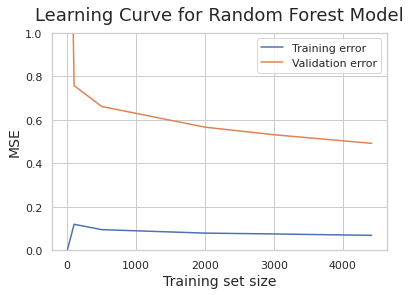

In [ ]:
train_sizes = [1, 100, 500, 2000, 3000, 4417]
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestRegressor(random_state=random_seed, n_estimators = cv_results['param_model__n_estimators'].iloc[0], min_samples_leaf= cv_results['param_model__min_samples_leaf'].iloc[0], min_samples_split= cv_results['param_model__min_samples_split'].iloc[0]),
X = X_train_val,
y = y_train_val,
train_sizes = train_sizes,
cv = 5,
scoring = 'neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning Curve for Random Forest Model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1)

####RandomizedSearchCV
Below are the model scores if hyperparameters are selected using Randomized Search. While the model performance of the linear models is not significantly different from the Grid Search results, Random Forest performs worse. Overall, our strongest model is the Random Forest model produced by Grid Seach. Therefore, we move forward with this model to predict quality scores for our test data and to interpret. 

In [ ]:
param_dists = {}

In [ ]:
from scipy.stats import uniform
# Set hyperparameter values for SGD Randomized Search

# The distribution for eta: a uniform distribution over [loc, loc + scale]
eta_dist_sgd = uniform(loc=0.001, scale=0.019)

# The distribution for alpha: a uniform distribution over [loc, loc + scale]
alpha_dist_sgd = uniform(loc=0.01, scale=0.09)

# Update param_dists
param_dists['sgd'] = [{'model__eta0': eta_dist_sgd,
                       'model__alpha': alpha_dist_sgd}]

In [ ]:
# Set hyperparameter values for Linear Regresssion Randomized Search

# The distribution for eta: a uniform distribution over [loc, loc + scale]
eta_dist_lr = uniform(loc=0.001, scale=0.019)

# The distribution for alpha: a uniform distribution over [loc, loc + scale]
alpha_dist_lr = uniform(loc=0.01, scale=0.09)

# Update param_dists
param_dists['lr_mbgd'] = [{'model__eta': eta_dist_lr,
                           'model__alpha': alpha_dist_lr}]

In [ ]:
from scipy.stats import randint

# Set parameters for Random Forest Regressor Randomized Search

# The grids for min_samples_split
min_samples_split_dist = randint(low=1, high=50)

# The grids for min_samples_leaf
min_samples_leaf_dist = randint(low=1, high=50)

# The grids for n_estimators
n_estimators_dist = randint(low=50, high=150)

# Update param_grids
param_dists['rf'] = [{'model__min_samples_split': min_samples_split_dist,
                       'model__min_samples_leaf': min_samples_leaf_dist,
                       'model__n_estimators': n_estimators_dist}]

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/cv_results/RandomizedSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by RandomizedSearchCV
best_score_params_estimator_rs = []

for acronym in pipes.keys():
    # RandomizedSearchCV
    rs = RandomizedSearchCV(estimator=pipes[acronym],
                            param_distributions=param_dists[acronym],
                            n_iter=4,
                            scoring='neg_mean_squared_error',
                            n_jobs=2,
                            cv=ps,
                            random_state=random_seed,
                            return_train_score=True)
        
    # Fit the pipeline
    rs = rs.fit(X_train_val, y_train_val)
    
    # Update best_score_param_estimators
    best_score_params_estimator_rs.append([rs.best_score_, rs.best_params_, rs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(rs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + 'result/cv_results/RandomizedSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_rs in descending order of the best_score_
best_score_params_estimator_rs = sorted(best_score_params_estimator_rs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_rs
pd.DataFrame(best_score_params_estimator_rs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,-0.529755,"{'model__min_samples_leaf': 21, 'model__min_sa...","((DecisionTreeRegressor(max_features='auto', m..."
1,-0.633758,"{'model__alpha': 0.015227525095137952, 'model_...","(SGDRegressor(alpha=0.015227525095137952, eta0..."
2,-0.636364,"{'model__alpha': 0.024041677639819285, 'model_...",(LinearRegression_MBGD(alpha=0.024041677639819...


## Interpretation
We move forward with interpretation of our best-performing model, Random Forest.

### Random Forest
Below, we present the feature importance of all our variables. While alcohol and volatile acidity are important, the other most linearly correlated variables (chlorides and density) rank lower in terms of feature importance in the Random Forest model. A bar chart of the top features is provided below, as well as scatterplots of the important features not observed previously to show any relationship with `quality` that may be visible. Based on the scatterplots, it looks like there is some negative linear trend. 

In [ ]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + '/result/randomforest/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rf, best_param_rf, best_estimator_rf = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_rf = pd.DataFrame(np.hstack((np.setdiff1d(df.columns, [target]).reshape(-1, 1), best_estimator_rf.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rf = df_fi_rf.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print df_fi_rfc
df_fi_rf

,Features,Importance
0,alcohol,0.254695
1,volatile acidity,0.127811
2,free sulfur dioxide,0.0873
3,sulphates,0.080604
4,total sulfur dioxide,0.072773
5,pH,0.0674
6,residual sugar,0.067261
7,chlorides,0.065698
8,density,0.059718
9,citric acid,0.057761


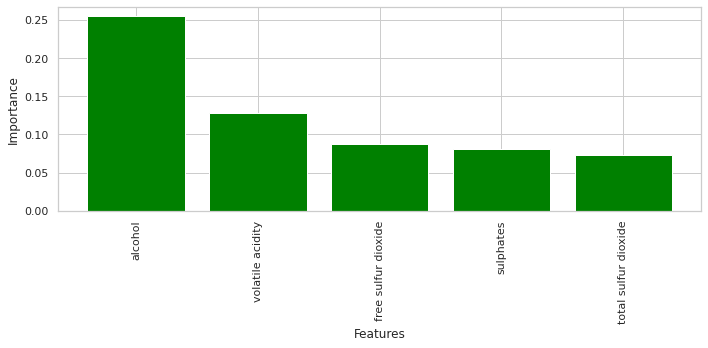

In [ ]:
# Create a figure
fig = plt.figure(figsize=(10, 5))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(df_fi_rf['Features'][:5], df_fi_rf['Importance'][:5], color='green')

# Set x-axis
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/randomforest/figure/feature_importance_rf.pdf')
plt.show()

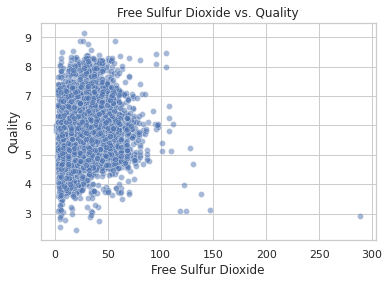

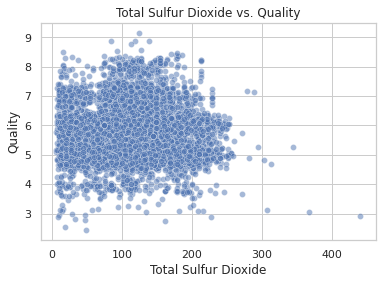

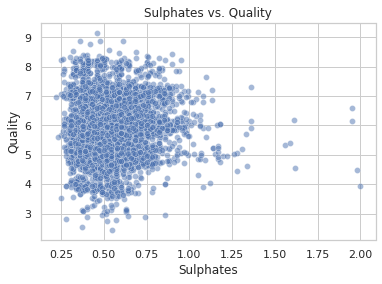

In [ ]:
# Scatter plots for variables most correlated with quality
sns.scatterplot(x = df_eda['free sulfur dioxide'], y = quality_jitter, alpha=10/20)
plt.title("Free Sulfur Dioxide vs. Quality")
plt.xlabel("Free Sulfur Dioxide")
plt.ylabel("Quality")
plt.show()

sns.scatterplot(x = df_eda['total sulfur dioxide'], y = quality_jitter, alpha=10/20)
plt.title("Total Sulfur Dioxide vs. Quality")
plt.xlabel("Total Sulfur Dioxide")
plt.ylabel("Quality")
plt.show()

sns.scatterplot(x = df_eda['sulphates'], y = quality_jitter, alpha=10/20)
plt.title("Sulphates vs. Quality")
plt.xlabel("Sulphates")
plt.ylabel("Quality")
plt.show()

### Prediction
To get a sense of how well our model estimates wine quality, we turn to our test data. For a more real-world application, we make our predictions and then reverse standardization on the predicted values and actual values to look at our error in terms of the actual quality score for ease of interpretation. We also analyze the difference between the error of our raw predicted values as well as rounded predicted values that more closely mimic the integer quality scores. To keep our interpretation on the scale our our data, we look at mean absolute error (MAE) to determine what range our model predicts in. If we consider that we would round the results our our model to the nearest integer, our MAE is roughly 0.35, suggesting our model can predict within +/- 0.35 on the quality scale. The MAE is slightly higher, at roughly 0.42, if we do not consider rounding our results. Realistically, this means that our model is typically not predicting a quality score off by more than one step, and suggests that this model would be usable in a real-world application.

In [ ]:
# Looking at predictions on test data 

# get best estimator
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

# predict test data
y_test_pred = best_estimator_gs.predict(X_test)

# reverse standardization on prediction
y_test_pred_orig = ss.inverse_transform(y_test_pred.reshape(-1, 1))

# reverse standardization on y actuals
y_test_orig = ss.inverse_transform(y_test.reshape(-1, 1))

dftest = pd.DataFrame(np.hstack((y_test_orig, y_test_pred_orig)), columns = ['actuals', 'predictions'])

dftest['rounded predictions'] = round(dftest['predictions'])

dftest['absolute_rounded_error'] = abs(dftest['actuals'] - dftest['rounded predictions'])

dftest['absolute_error'] = abs(dftest['actuals'] - dftest['predictions'])

dftest.head()

print("Rounded MAE: ", dftest['absolute_rounded_error'].mean())
print("Raw MAE: ", dftest['absolute_error'].mean())

Rounded MAE:  0.3476923076923077
Raw MAE:  0.4217230769230771


## References:
* P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
* Parmar, Raj. (n.d.). Wine Quality, Version 1. Retrieved 6/11/2022 from https://www.kaggle.com/datasets/rajyellow46/wine-quality?select=winequalityN.csv.